WHAT ARE THE MOST DMEANDED SKILLS FOR THE TOP 3 MOST POPULAR DATA ROLES

Methodology

 1. cleaned up skill column
 2. calculated skill coumnt based on job_title_short
 3. calcuted the skill percentage
 4. plotted final findings

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("lukebarousse/data_jobs", split="train")

# Convert to a pandas DataFrame
df = dataset.to_pandas()

#data clean up
df['job_posted_date'] = pd.to_datetime(df.job_posted_date )
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

# Display the first few rows
df.head()

c:\Users\allen\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [2]:
df_ng = df[df['job_country'] == 'Nigeria']
df_ng.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
255,Machine Learning Engineer,Machine Learning Engineer,"Abuja, Nigeria",via LinkedIn Nigeria,Full-time,False,Nigeria,2023-11-08 13:50:20,False,False,Nigeria,None,NaN,NaN,UNICCON Group of Companies,"[python, c++, pytorch, tensorflow, nltk, docke...","{'libraries': ['pytorch', 'tensorflow', 'nltk'..."
1491,Data Scientist,Data Scientist,"Lagos, Nigeria",via MyJobMag,Full-time,False,Nigeria,2023-09-21 13:34:12,False,False,Nigeria,None,NaN,NaN,Estrada International Staffing Solutions,"[python, r, hadoop, spark, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'li..."
3242,Software Engineer,Python Engineer-Talent Pipeline (Remote),"Lagos, Nigeria",via HR Software For Growing Businesses | Fresh...,Full-time,False,Nigeria,2023-08-09 13:58:18,True,False,Nigeria,None,NaN,NaN,Data2Bots,"[python, sql, aws, pandas, spark, kafka, airfl...","{'cloud': ['aws'], 'libraries': ['pandas', 'sp..."
3250,Data Scientist,Data Science Specialist- BMGF (HCD+),"Abuja, Nigeria",via Job Vacancies And Recruitment In Kenya,Contractor,False,Nigeria,2023-01-02 13:32:39,False,False,Nigeria,None,NaN,NaN,DAI,None,None
4159,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn Nigeria,Full-time,True,Nigeria,2023-09-01 13:43:38,False,False,Nigeria,None,NaN,NaN,Quales Consulting,"[python, java, mongodb, mongodb, aws, terrafor...","{'cloud': ['aws'], 'databases': ['mongodb'], '..."


In [3]:
#explode skills column
df_skills = df_ng.explode('job_skills')

#visialize to see whats inside
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
255,Machine Learning Engineer,python
255,Machine Learning Engineer,c++
255,Machine Learning Engineer,pytorch
255,Machine Learning Engineer,tensorflow
255,Machine Learning Engineer,nltk
...,...,...
779923,Data Scientist,spark
779923,Data Scientist,tableau
782054,Data Analyst (MIS),power bi
782054,Data Analyst (MIS),excel


In [4]:
#group by job skills and title
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

#turning it into a dataframe
df_skills_count = df_skills_count.reset_index(name= 'skill_count')

#sort data
df_skills_count.sort_values(by = 'skill_count', ascending = False, inplace = True)

df_skills_count


,job_skills,job_title_short,skill_count
416,python,Data Scientist,139
130,excel,Data Analyst,130
547,sql,Data Analyst,117
415,python,Data Engineer,113
548,sql,Data Engineer,109
...,...,...,...
199,graphql,Cloud Engineer,1
578,tensorflow,Business Analyst,1
625,word,Senior Data Engineer,1
626,zoom,Machine Learning Engineer,1


Top 3 Roles

In [5]:
job_titles = df_skills_count.job_title_short.unique().tolist()   #--------- to list turns it into a list from an array

#sort by for to 3 job title
job_titles= sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plot figure

<function matplotlib.pyplot.show(close=None, block=None)>

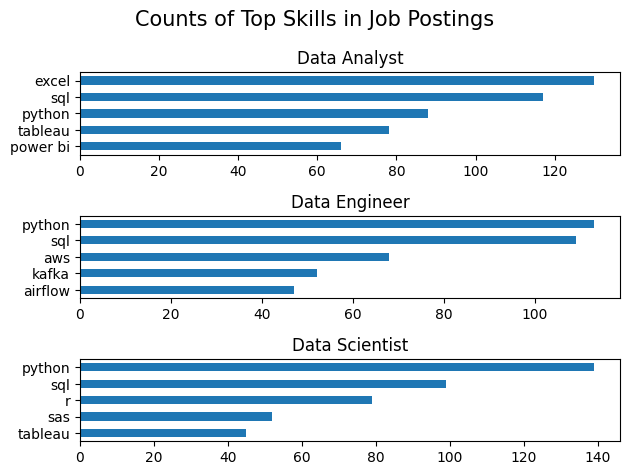

In [6]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind ='barh', x = 'job_skills', y = 'skill_count', ax =ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()
plt.show

to adda %

In [7]:
#step 1 get the aggregation of job title values 
df_job_title_count = df_ng.job_title_short.value_counts().reset_index(name = 'jobs_total')   #--------- reset index turns it to a dataframe
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,304
1,Data Scientist,205
2,Data Engineer,190
3,Software Engineer,124
4,Business Analyst,73
5,Senior Data Scientist,38
6,Machine Learning Engineer,35
7,Senior Data Engineer,33
8,Cloud Engineer,31
9,Senior Data Analyst,19


In [8]:
#merge job title  with skills count

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how ='left', on ='job_title_short')
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count']/ df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,139,205,67.804878
1,excel,Data Analyst,130,304,42.763158
2,sql,Data Analyst,117,304,38.486842
3,python,Data Engineer,113,190,59.473684
4,sql,Data Engineer,109,190,57.368421
...,...,...,...,...,...
623,graphql,Cloud Engineer,1,31,3.225806
624,tensorflow,Business Analyst,1,73,1.369863
625,word,Senior Data Engineer,1,33,3.030303
626,zoom,Machine Learning Engineer,1,35,2.857143


Replot to effect above changes

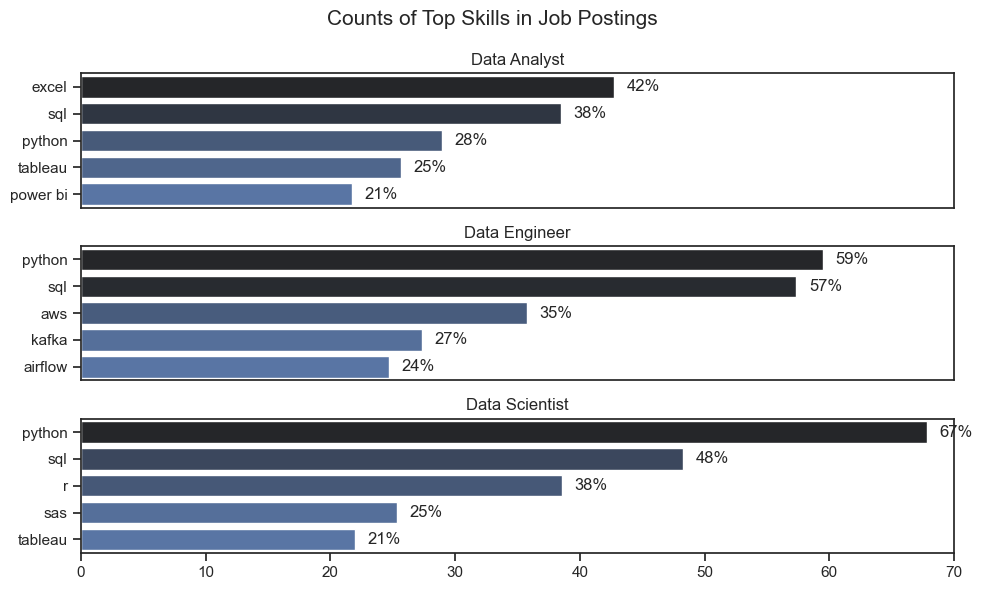

In [10]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, len(job_titles) * 2))  # Increase width and height
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 70)

    # Add the percentage value to each bar
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{int(v)}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

# Set overall title and layout
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()


plt.show()
